In [1]:
from random import random
from typing import Callable
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from math import log
sns.set_theme(style='darkgrid')
pallete = sns.color_palette('Paired')

---
# Ejercicio 1
El siguiente codigo simula valores de una variable aleatoria X.

In [3]:
A = [0,1,1,2,2,2,3,3,3]
B = [0,0,0,1,1,2,2,2,2,2]

def UrnaX():
    U = random()
    if U < 0.9:
        return A[int(random() * 9)]
    else:
        return B[int(random() * 10)]

    

**a)** Dar la funcion de probabilidad de masa de la variable X

La fpm de X está dada por:
$$
p_X(x) =
\begin{cases}
    0.13 \quad \text{si } x = 0\\[0.3cm]
    0.22 \quad \text{si } x = 1\\[0.3cm]
    0.35 \quad \text{si } x = 2\\[0.3cm]
    0.30 \quad \text{si } x = 3
\end{cases}
$$


In [4]:
def p_X(x: int) -> float:
    """
    Función de probabilidad de masa de X

    Args:
        x (int): Valor en el dominio de p

    Returns:
        float: Probabilidad para x
    """
    probs = {
        0: 0.13,
        1: 0.22,
        2: 0.35,
        3: 0.30
    }
    return probs.get(x, 0.0)

**b)** Dar un algoritmo basado en el metodo de aceptación y rechazo para generar valores de la misma variable. 

▶ Escribir el correspondiente codigo en Python *algo_x(p)* cuyo argumento sea el vector de probabilidades
de X.

In [5]:
def uniformX(a:int, b:int) -> int:
    return int(random() * (b - a + 1)) + a


def algo_x(p:Callable[[int], float]) -> int:
    """
    Variable aleatoria X
    Utilizando Método de rechazo

    Args:
        p (Callable[[int], float]): Función de probabilidad de masa

    Returns:
        int: Valor generado entre 0 y 3
    """
    while True:
        #Simular Y
        Y = uniformX(a=0, b=3)
        q_Y = 1/4
        U = random()
        c = 0.30 #Máximo valor de probabilidad en la fpm
        if U < p(Y) / c * q_Y:
            return Y


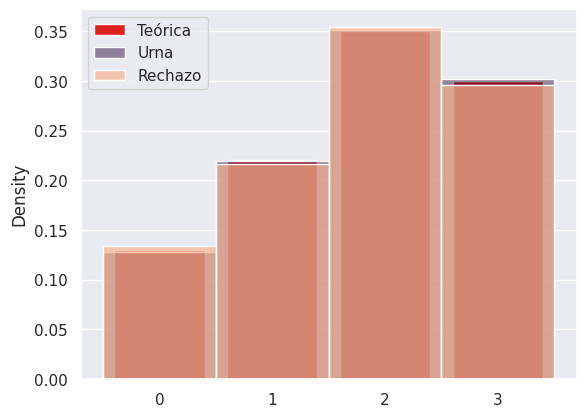

In [7]:
Nsim = 10_000

MR_samples = [algo_x(p=p_X) for _ in range(Nsim)]
Urn_samples = [UrnaX() for _ in range(Nsim)]
x_values = [0,1,2,3]
p_X_values = [p_X(x) for x in x_values]

sns.barplot(x=x_values, y=p_X_values, color='red' , label="Teórica")
sns.histplot(Urn_samples, stat='density', discrete=True, alpha=0.5, color=pallete[0], label="Urna")
sns.histplot(MR_samples, stat='density', discrete=True, alpha=0.7, color=pallete[5], label="Rechazo")

plt.legend()
plt.show()


---
Ejercicio 2: Considerar una variable aleatoria X con función de densidad f dada por:

$$
f(x) =
\begin{cases}
    \sqrt{x} \quad \text{si } 0\leq x < 1\\[0.4cm]
    \frac{1}{3} \quad \text{si } 1 \leq x \leq 2\\[0.4cm]
    0 \quad cc
\end{cases}
$$

a) Explicar como se aplica el método de la transformada inversa para obtener un algoritmo que simula valores de $X$. Considerar $U ∼ \mathcal{U} (0, 1)$. Calcular explícitamente el valor de $X$ que devuelve el algoritmo para cada uno de los siguientes valores de $U$:
- $U$ = 0.2 $\Longrightarrow x\rightarrow 0.4481$
- $U$ = 0.5 $\Longrightarrow x\rightarrow 0.8255$
- $U$ = 0.8 $\Longrightarrow x\rightarrow 1.4$


**[En la hoja]**

---
**b)** Escribir un codigo en Python *ejercicio2()* que genere valores de $X$ segun *a)*. Utilizar este código
para estimar $P(X > 4)$.

In [ ]:
def ejercicio2 () -> float:
    U = random()
    if U < 2/3: return ((9/4) * (U**2)) ** 1/3
    else: return 3*U-1

def simulation_probability(Nsim:int) -> float:
    probability = 0
    for _ in range(Nsim):
        X = ejercicio2 ()
        if X > 4:
            probability+=1
    return probability / Nsim

In [10]:
estimation = simulation_probability(Nsim=100_000)
print(f"P(X>4) = {estimation:4f}")

P(X>4) = 0.000000


---
# Ejercicio 3
Considerar un proceso de Poisson no homogeneo con funci ´ on de intensidad dada por:
$$
\lambda(t)=
\begin{cases}
5+5t \quad \text{si }0\leq t < 3\\[0.3cm]
20   \quad \text{si }3\leq t \leq 5\\[0.3cm]
30-2t\quad \text{si }5 < t \leq 9 
\end{cases}
$$

**a)** Suponer que se aplica el metodo de adelgazamiento para simular los tiempos de arribos utilizando un proceso de Poisson homogeneo con tasa $\lambda = 20$ ¿Con que probabilidad se contar a un evento del proceso homogeneo en $t = 4$ y con que probabilidad en t = 7.

b) Escribir en Python un codigo `hot_dog(T)` aplicando el metodo de adelgazamiento mejorado. El programa debe devolver un arreglo con todos los tiempos de arribo hasta el tiempo $T (0 ≤ T ≤ 9)$, Para esto particionar el intervalo $[0, 9]$ en subintervalos con extremos en $0, 1, 2, 6, 8$ y $9$. Usar este codigo para estimar el numero esperado de arribos en el intervalo $[0, 9]$.

In [27]:
# Función de densidad lambda
def lamda_density(t:float) -> float:
    """
    Función de densidad del ejercicio

    Args:
        t (int): Parámetro entero de tiempo

    Returns:
        float: Densidad de probabilidad hasta t
    """
    return np.where(
        (0 <= t) & (t < 3),
        5 + 5*t,
        np.where(
            (3<= t) & (t<=5),
            20,
            np.where(
                (5 < t) & (t <= 9),
                30 - 2*t,
                0
            )
        )
    )

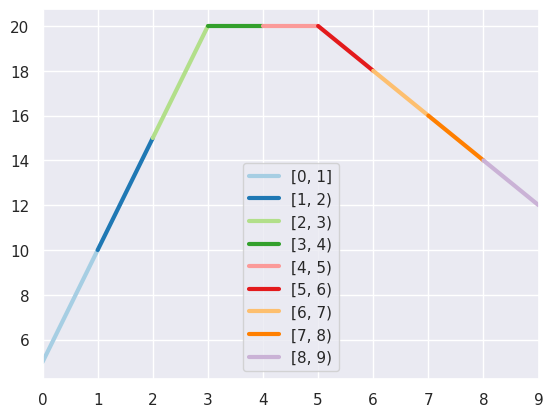

In [ ]:
#Densidad particionada
for i in range(9):
    x = np.linspace(i, i + 1, 1000)
    label = f"[{i}, {i + 1}{')' if  i > 0 & i < 8 else ']'}"
    sns.lineplot(x=x, y=lamda_density(x), label=label, color=pallete[i], linewidth=3)
plt.xlim(0,9)
plt.legend()
plt.show()

Para ello antes debo acotar cada intervalo con un $\lambda_i$, tal que $\lambda_i(t) \leq \lambda_i$
Podemos ver claramente en la gráfica donde crece, donde decrece y donde es constante la función, facilitando así la búsqueda de cada cota:

**Intervalos en función creciente**
Se maximiza en el máximo valor de $t$ en el intervalo.
- $[0, 1]$ -> $\lambda_1 = \lambda(1) = 5+5\cdot 1= 10$
- $[1, 2)$ -> $\lambda_2 = \lambda(2) = 5+5\cdot 2= 15$
- $[2 ,3)$ -> $\lambda_3 = \lambda(3) = 5+5\cdot 3= 20$

**Intervalos en función constante**
Único valor de $t$ posible
- $[3, 4)$ -> $\lambda_4 = 20$
- $[4, 5)$ -> $\lambda_5 = 20$

**Intervalos en función decreciente**
Se maximiza en el mínimo valor de $t$ en el intervalo.
- $[5, 6)$ -> $\lambda_6 = \lambda(5) = 30 - 2 \cdot 5= 20$
- $[6, 7)$ -> $\lambda_7 = \lambda(6) = 30 - 2 \cdot 6= 18$
- $[7, 8)$ -> $\lambda_8 = \lambda(7) = 30 - 2 \cdot 7= 16$
- $[8, 9]$ -> $\lambda_9 = \lambda(8) = 30 - 2 \cdot 8= 14$

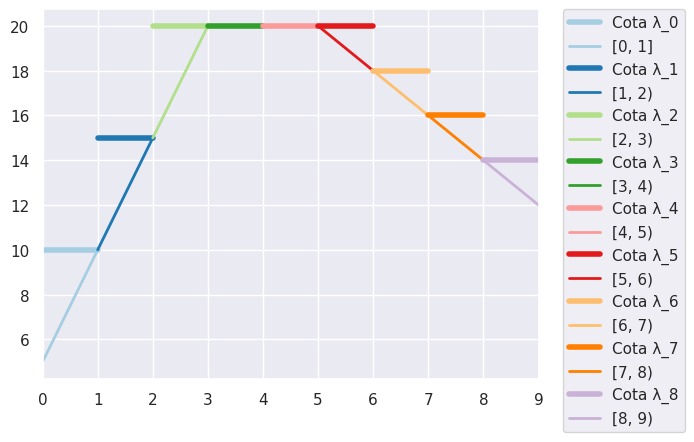

In [55]:
#Densidad particionada
lamda = [10, 15, 20, 20, 20, 20, 18, 16, 14]
for i in range(9):
    x = np.linspace(i, i + 1, 1000)
    label = f"[{i}, {i + 1}{')' if  i > 0 & i < 8 else ']'}"
    sns.lineplot(x=x, y=lamda[i], label=f"Cota λ_{i}", color=pallete[i], linewidth=4)
    sns.lineplot(x=x, y=lamda_density(x), label=label, color=pallete[i], linewidth=2)


plt.xlim(0,9)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [68]:
def hot_dog(T:int, lamda_density:Callable[[float], float]) -> tuple[int, float]:
    intervals = [0, 1, 2, 6, 8, 9]
    lamda = [10, 15, 20, 20, 20, 20, 18, 16, 14]
    i = 0
    t = -log(1 - random()) / lamda[i]
    NT = 0
    arrival_times = []
    while t <= T:
        if t <= intervals[i]:
            V = random()
            if V < lamda_density(t) / lamda[i]:
                NT += 1
                arrival_times.append(t)
            t += -log(1 - random()) / lamda[i]
        else:
            if i+1 > len(intervals): break
            t = intervals[i] + (t - intervals[i]) * lamda[i] / lamda[i+1]
            i += 1
    return NT, arrival_times

In [70]:
Nsim = 10_000
samples = [hot_dog(T=9, lamda_density=lamda_density)[0] for _ in range(Nsim)]
samples_mean = np.mean(samples)
print(f"🔢 NÚMERO ESPERADO DE ARRIBOS 📥 EN [0,9] -> {samples_mean}")

🔢 NÚMERO ESPERADO DE ARRIBOS 📥 EN [0,9] -> 141.5666


---
# Ejercicio 4

Se desea estimar mediante Monte Carlo el área encerrada por la curva en el plano cuyos puntos
satisfacen la ecuación:
$$
x² + (y - |x|^{\frac{3}{2}})² = 1
$$
La curva queda contenida en el interior del rectángulo con vértices en $(−1.5, 1.5)$, $(−1.5, 1.5)$, $(1.5, 1.5)$, y $(1.5, −1.5)$.

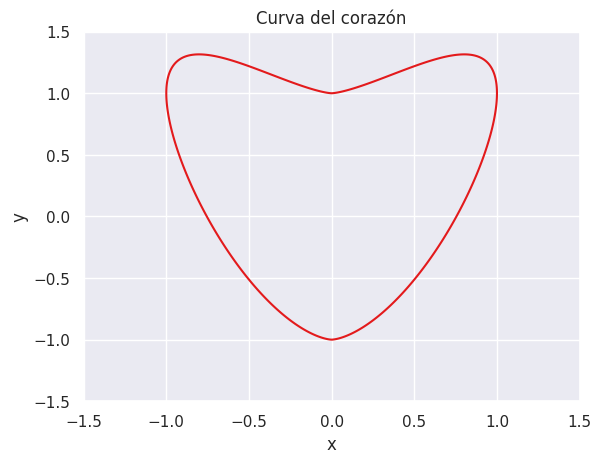

In [2]:
x_vals = np.linspace(-1.5, 1.5, 1000)
y_vals = np.linspace(-1.5, 1.5, 1000)

X, Y = np.meshgrid(x_vals, y_vals)


Z = X**2 + (Y - np.abs(X)**(3/2))**2


plt.contour(X, Y, Z, levels=[1], colors=pallete[5])
plt.title("Curva del corazón")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()


a) Explicar y fundamentar cómo se estima mediante simulación el área encerrada por la curva por el método de Monte Carlo.

**b)** Escribir un programa area(N) que estime el área con N simulaciones. Dar el valor obtenido para
N = 100000 utilizando 6 decimales.

In [22]:
def area(N:int) -> tuple[list[tuple[float, float]], float]:
    """
    Realiza una estimación del área de la curva del corazón
    con N simulaciones

    Args:
        N (int): Cantidad de simulaciones

    Returns:
        tuple: Lista de puntos dentro de la curva
        Estimación del área de la curva
    """
    in_area = 0
    points_in_area = []
    for _ in range(N):
        U = 3 * random() - 1.5
        V = 3 * random() - 1.5
        if U**2 + (V - abs(U)**(3/2))**2 <= 1:
            points_in_area.append((U, V))
            in_area += 1
    return points_in_area, 9 * in_area / N

📏ESTIMACIÓN DEL AREA: 3.137400


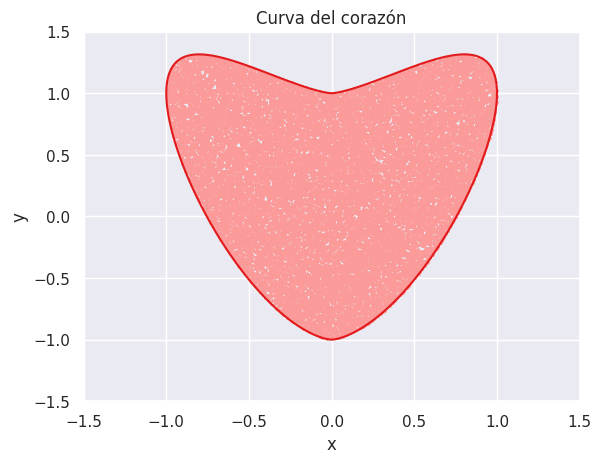

In [21]:
N = 100_000
x_vals = np.linspace(-1.5, 1.5, 1000)
y_vals = np.linspace(-1.5, 1.5, 1000)
X, Y = np.meshgrid(x_vals, y_vals)

Z = X**2 + (Y - np.abs(X)**(3/2))**2

results = area(N=N)
points = results[0]
iterations = len(points)

x_vals = [x for x, y in points]
y_vals = [y for x, y in points]


print(f"📏ESTIMACIÓN DEL AREA: {results[1]:.6f}")

plt.scatter(x_vals, y_vals, color=pallete[4], s=1, alpha=1, label='Puntos dentro del círculo')
plt.contour(X, Y, Z, levels=[1], colors=pallete[5])
plt.title("Curva del corazón")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()
